### Task 3 : Netflix Stock Price Prediction using Linear Regression
#### Done by : Umesh Chandra Srirangam 👨‍💼
#### Domain : Data Science 📊
#### Tools used
1.   Google Colab 🖥️
2.   Python Libraries
        *   NumPy 🧮
        *   Pandas 🐼
        *   Sklearn 🤖
        *   Matplotlib 📈
        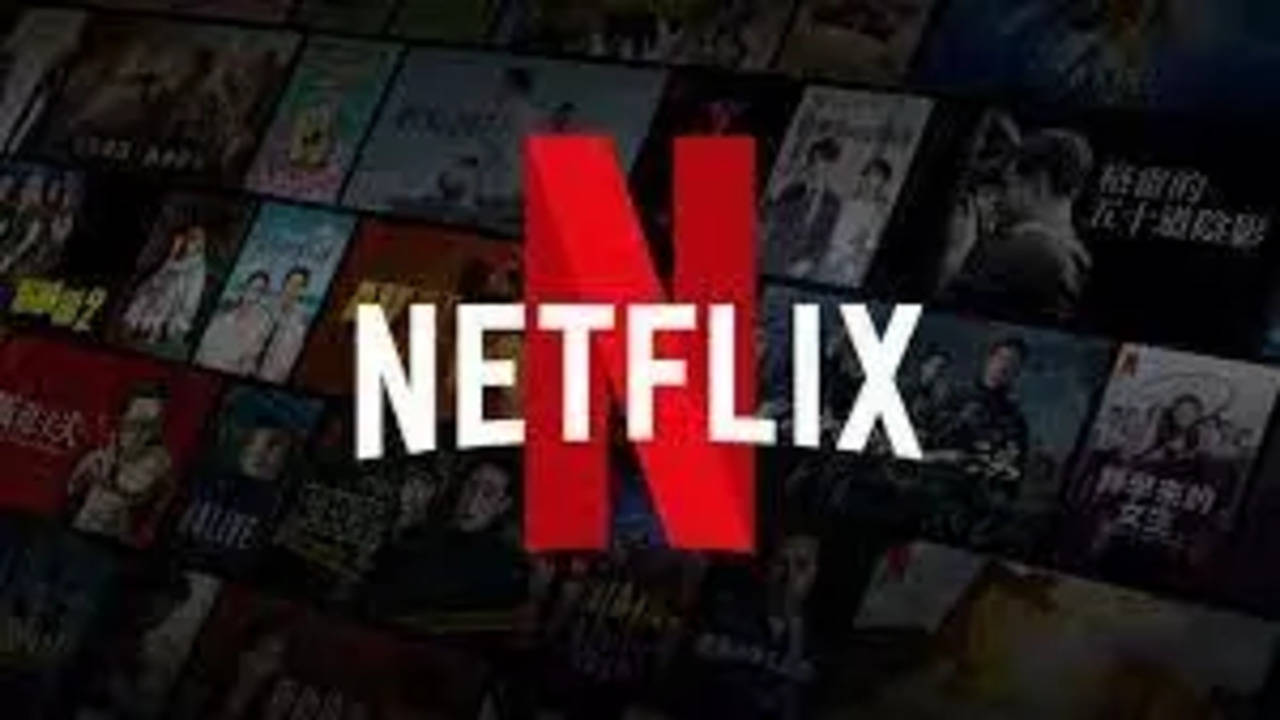



#### Let us import the required Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

### Data Loading and Preprocessing

In [2]:
df=pd.read_csv('NFLX.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
bac=df.copy()

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.shape

(1009, 7)

In [8]:
df.size

7063

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


#### Let us make use of train_test_split and split out dataset into train and test parts with a test size of 20% of original dataset.Let the random state of the division be 42.

In [11]:
train,test=train_test_split(df,test_size=0.2,random_state=42)

#### Let us save a copy of test dataset for future purposes.

In [12]:
test_pred = test.copy()

In [13]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
29,2018-03-19,315.799988,317.000000,307.339996,313.480011,313.480011,9925200
280,2019-03-19,366.399994,366.959991,356.799988,358.779999,358.779999,7541400
507,2020-02-11,373.750000,378.109985,369.720001,373.690002,373.690002,4772900
706,2020-11-23,490.459991,491.149994,475.839996,476.619995,476.619995,5416600
877,2021-07-30,512.690002,519.789978,510.959991,517.570007,517.570007,2534900


In [14]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
628,2020-08-04,498.649994,510.440002,498.649994,509.640015,509.640015,5608000
631,2020-08-07,505.450012,508.290009,486.679993,494.730011,494.730011,5910300
741,2021-01-14,507.350006,514.500000,499.579987,500.859985,500.859985,4177400
514,2020-02-21,385.329987,387.320007,377.899994,380.070007,380.070007,3930100
365,2019-07-19,323.399994,325.850006,314.230011,315.100006,315.100006,16302500


#### Let us divide the variables required for outcome prediction. IN this case our outcome that we have to predict is Close point of the stock.

In [15]:
X_train=train[['Open','High','Low','Volume']].values
X_test=test[['Open','High','Low','Volume']].values

In [16]:
y_train = train['Close'].values
y_test = test['Close'].values

#### Let us build a Linear Regression Model for this scenario.

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [18]:
res=model.predict([[262.000000,267.899994,250.029999,11896100]])
print(res)

[257.74532336]


In [23]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 15.977
RMSE 3.997
MAE 2.857
MAPE 0.007
R2 Score :  0.999


#### Data Visualization

In [24]:
def style():
  plt.figure(facecolor='black',figsize=(15,10))
  ax=plt.axes()
  ax.tick_params(axis='x',colors='white')     #setting up Y-axis tick color to white
  ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white
  ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
  ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white
  ax.set_facecolor("black")

In [25]:
bac['Date']=pd.to_datetime(bac['Date'],format='%Y-%m-%d')

In [27]:
data = pd.DataFrame(bac[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


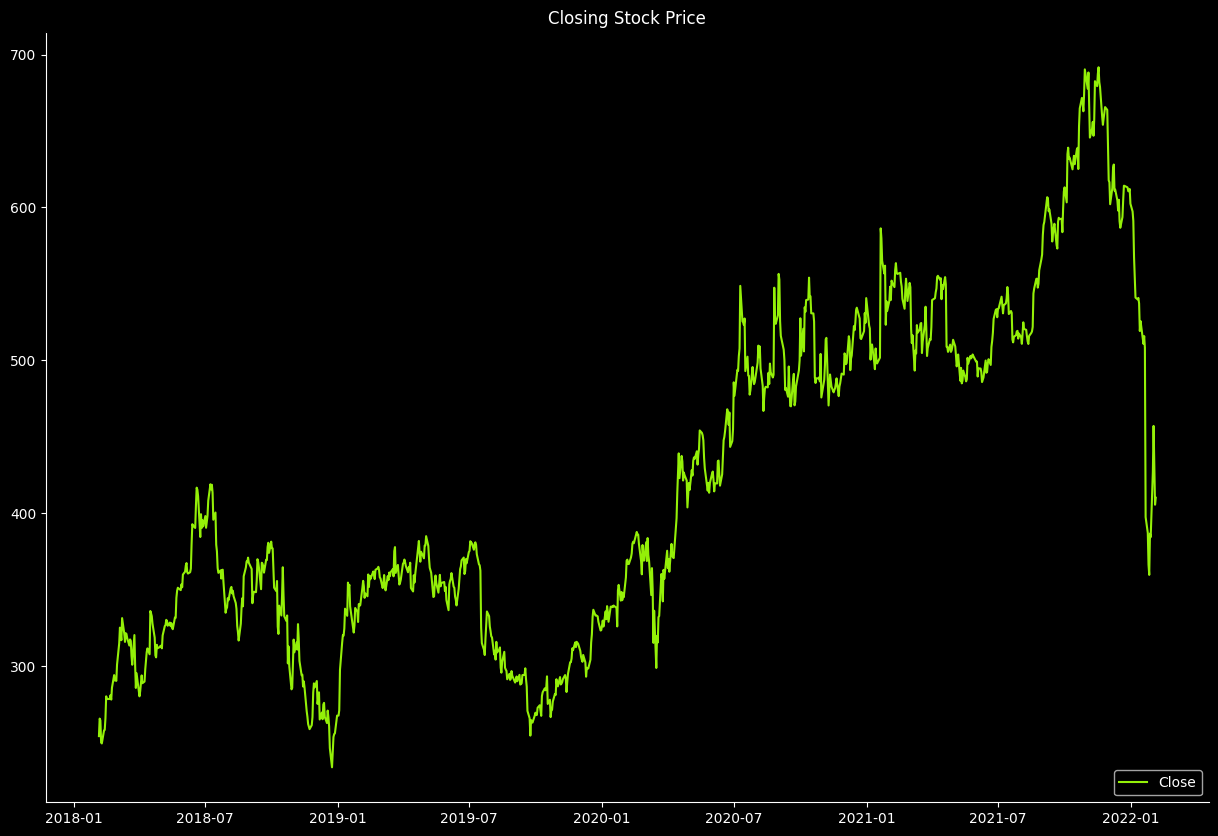

In [29]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(bac.Date, bac.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

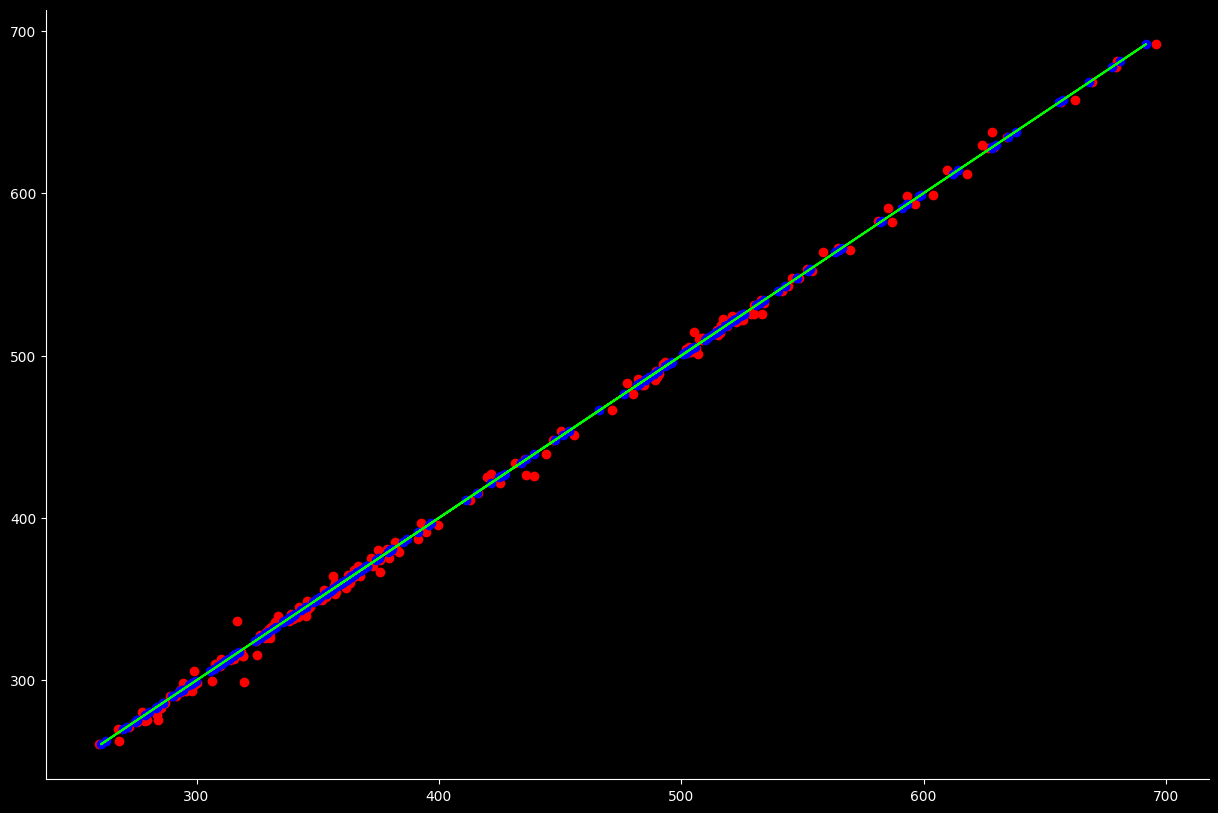

In [30]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [31]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
628,2020-08-04,498.649994,510.440002,498.649994,509.640015,509.640015,5608000,508.503210
631,2020-08-07,505.450012,508.290009,486.679993,494.730011,494.730011,5910300,492.622129
741,2021-01-14,507.350006,514.500000,499.579987,500.859985,500.859985,4177400,506.904498
514,2020-02-21,385.329987,387.320007,377.899994,380.070007,380.070007,3930100,380.941828
365,2019-07-19,323.399994,325.850006,314.230011,315.100006,315.100006,16302500,319.219895
...,...,...,...,...,...,...,...,...
780,2021-03-12,512.500000,526.510010,506.589996,518.020020,518.020020,3981700,519.060313
334,2019-06-05,354.380005,357.880005,348.709991,355.730011,355.730011,5020100,352.755201
210,2018-12-04,288.130005,295.739990,274.720001,275.329987,275.329987,12800600,284.160124
350,2019-06-27,363.200012,370.850006,363.200012,370.019989,370.019989,4138600,369.504603


In [32]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [33]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-20,278.549988,283.777967
2018-02-21,NaN,NaN
2018-02-22,NaN,NaN
2018-02-23,NaN,NaN
2018-02-24,NaN,NaN
...,...,...
2022-01-27,386.700012,391.315629
2022-01-28,NaN,NaN
2022-01-29,NaN,NaN


In [34]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
